In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-to-name/cat_to_name.json
/kaggle/input/flowersdata/flowers/valid/7/image_07216.jpg
/kaggle/input/flowersdata/flowers/valid/47/image_04957.jpg
/kaggle/input/flowersdata/flowers/valid/47/image_04989.jpg
/kaggle/input/flowersdata/flowers/valid/47/image_05007.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03876.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03829.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03908.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03843.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03883.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03831.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03851.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03834.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03890.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03868.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03854.jpg
/kaggle/input/flowersdata/flowers/valid/17/image_03839.jpg
/kaggle/input/

In [7]:
# Imports here
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
from PIL import Image
import json
from collections import OrderedDict 
import torchvision

In [8]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [9]:
import torch
from torchvision import datasets, transforms

# Define the paths to your dataset directories
train_dir = "/kaggle/input/flowersdata/flowers/train"
test_dir = "/kaggle/input/flowersdata/flowers/test"
valid_dir = "/kaggle/input/flowersdata/flowers/valid"

# Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)

# Define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True)


In [10]:
# TODO: Build and train your network
def nn_setup(structure = 'vgg16', lr = 0.001):
    
    model = models.vgg16(pretrained = True)
    for param in model.parameters():
        param.requires_grad = False
       
    model.classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 2048)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(2048, 256)),
                          ('relu', nn.ReLU()),
                          ('fc3', nn.Linear(256, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    model = model.to('cuda')
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr)
    
    return model, criterion, optimizer

In [11]:
model, criterion, optimizer = nn_setup()
print(model)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 165MB/s]  


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [12]:
epochs = 3
print_every = 5
steps = 0
loss_show = []

for e in range(epochs):
    running_loss = 0
    for inputs, labels in trainloader:
        steps += 1
        
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        
        optimizer.zero_grad()
        
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            model.eval()
            valid_loss = 0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in validloader:
                    inputs, labels = inputs.to('cuda'), labels.to('cuda')
                    
                    log_ps = model.forward(inputs)
                    batch_loss = criterion(log_ps, labels)
                    valid_loss += batch_loss.item()
                    
                    ps = torch.exp(log_ps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            print(f"Epoch {e+1}/{epochs}.. "
                  f"Loss: {running_loss/print_every:.3f}.. "
                  f"Validation Loss: {valid_loss/len(validloader):.3f}.. "
                  f"Accuracy: {accuracy/len(validloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/3.. Loss: 5.391.. Validation Loss: 4.777.. Accuracy: 0.095
Epoch 1/3.. Loss: 4.384.. Validation Loss: 3.836.. Accuracy: 0.210
Epoch 1/3.. Loss: 3.974.. Validation Loss: 3.323.. Accuracy: 0.285
Epoch 1/3.. Loss: 3.181.. Validation Loss: 2.770.. Accuracy: 0.393
Epoch 1/3.. Loss: 2.898.. Validation Loss: 2.234.. Accuracy: 0.470
Epoch 1/3.. Loss: 2.434.. Validation Loss: 2.065.. Accuracy: 0.496
Epoch 1/3.. Loss: 2.246.. Validation Loss: 1.674.. Accuracy: 0.564
Epoch 1/3.. Loss: 2.084.. Validation Loss: 1.641.. Accuracy: 0.585
Epoch 1/3.. Loss: 1.861.. Validation Loss: 1.495.. Accuracy: 0.601
Epoch 1/3.. Loss: 1.757.. Validation Loss: 1.472.. Accuracy: 0.621
Epoch 1/3.. Loss: 1.673.. Validation Loss: 1.152.. Accuracy: 0.686
Epoch 1/3.. Loss: 1.642.. Validation Loss: 1.114.. Accuracy: 0.693
Epoch 1/3.. Loss: 1.583.. Validation Loss: 1.052.. Accuracy: 0.694
Epoch 1/3.. Loss: 1.584.. Validation Loss: 1.060.. Accuracy: 0.707
Epoch 1/3.. Loss: 1.536.. Validation Loss: 1.097.. Accuracy: 0

In [13]:
# TODO: Do validation on the test set
test_loss = 0
accuracy = 0
model.to('cuda')

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        
        log_ps = model.forward(inputs)
        batch_loss = criterion(log_ps, labels)
                    
        test_loss += batch_loss.item()
                    
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        
print(f"Test accuracy: {accuracy/len(testloader):.3f}")

Test accuracy: 0.813


In [14]:
# TODO: Save the checkpoint 
model.class_to_idx = train_data.class_to_idx
torch.save({'input_size': 25088,
            'output_size': 102,
            'structure': 'vgg16',
            'learning_rate': 0.001,
            'classifier': model.classifier,
            'epochs': epochs,
            'optimizer': optimizer.state_dict(),
            'state_dict': model.state_dict(),
            'class_to_idx': model.class_to_idx}, 'checkpoint.pth')

In [15]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_model(path):
    checkpoint = torch.load('checkpoint.pth')
    structure = checkpoint['structure']
    model,_,_ = nn_setup()
    model.class_to_idx = checkpoint['class_to_idx']
    model.load_state_dict(checkpoint['state_dict'])
    return model

In [16]:
model = load_model('checkpoint.pth')
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model
    img_pil = Image.open(image)
    img_transforms = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])])
    
    image = img_transforms(img_pil)
    
    return image

In [18]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [27]:
import json

# Read the JSON file
with open('/kaggle/input/cat-to-name/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)


In [31]:

json_file_path = '/kaggle/input/cat_to_name.json'


In [32]:
import torch
import numpy as np

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # Set the model to evaluation mode
    model.eval()
    
    # Load the image and process it
    img = process_image(image_path)
    
    # Add batch dimension
    img = img.unsqueeze(0)
    
    # Move the tensor to the appropriate device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img = img.to(device)
    model.to(device)
    
    # Turn off gradients to speed up inference
    with torch.no_grad():
        # Perform forward pass
        output = model(img)
        # Calculate class probabilities
        probabilities = torch.exp(output)
        # Find the topk predictions
        top_probs, top_indices = probabilities.topk(topk)
    
    # Convert probabilities and indices to lists
    top_probs = top_probs.squeeze().tolist()
    top_indices = top_indices.squeeze().tolist()
    
    # Convert indices to class labels
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    top_classes = [idx_to_class[index] for index in top_indices]
    
    return top_probs, top_classes

# Example usage:
# Replace 'process_image' with your actual image processing function
# Replace 'model' with your trained model
# Replace 'image_path' with the path to the image you want to predict
# Replace 'topk' with the number of top classes you want to retrieve
# top_probs, top_classes = predict(image_path, model, topk)


In [40]:
# Print the type of ps[1][0]
print("Type of ps[1][1]:", type(ps[1][1]))

# Check the shape of ps[1][0] if it's a NumPy array
if isinstance(ps[1][1], np.ndarray):
    print("Shape of ps[1][1]:", ps[1][1].shape)


Type of ps[1][1]: <class 'str'>


In [44]:
if isinstance(ps[1][0], (list, tuple, set, dict)):
    # Handle iterable object
    for item in ps[1][0]:
        # Process each item
        print(item)  # Placeholder for processing each item
else:
    # Handle non-iterable object
    value = ps[1][0]
    # Process the value directly
    print(value)  # Placeholder for processing the value directly


21


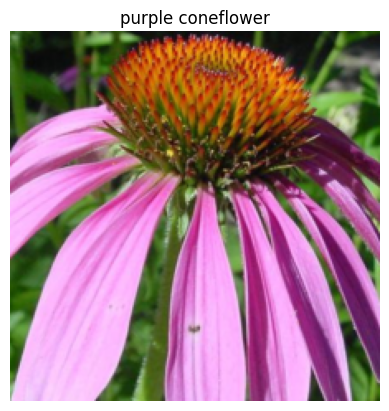

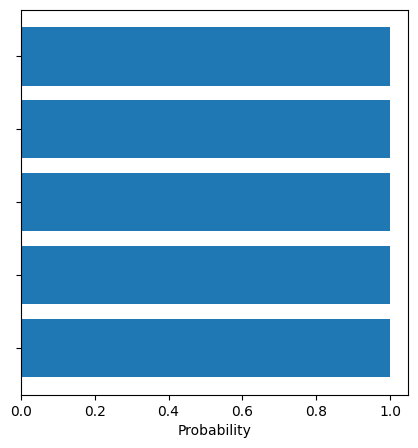

In [56]:
plt.rcdefaults()
fig, ax = plt.subplots()

index = 17  # Set index to 17 to get the class name corresponding to index 21
path = test_dir + '/17/image_03830.jpg'
ps = predict(path, model)
image = process_image(path)

ax1 = imshow(image, ax=plt)
ax1.axis('off')
ax1.title(cat_to_name[str(index)])

a = np.array(ps[0][0])

# Check if ps[1][0] is iterable before attempting to iterate over it
if isinstance(ps[1][0], np.ndarray) and ps[1][0].ndim > 0:
    b = [cat_to_name[str(index)] for index, _ in enumerate(ps[1][0])]
else:
    # Handle the case when ps[1][0] is not iterable
    # You may want to define a default behavior here
    b = []

fig, ax2 = plt.subplots(figsize=(5, 5))

y_pos = np.arange(5)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(b)
ax2.set_xlabel('Probability')
ax2.invert_yaxis()
ax2.barh(y_pos, a)

plt.show()


In [57]:
# TODO remove .pth files or move it to a temporary `~/opt` directory in this Workspace
!ls

checkpoint.pth
